<a href="https://colab.research.google.com/github/bigbulgogiburger/webdev/blob/main/haNeunJung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#넘파이 판다스 임포트
import numpy as np
import pandas as pd

In [ ]:
#기타 등등 머신러닝 툴 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
#최근접 이웃 사용하기

In [ ]:
wine = load_wine()

In [ ]:
data = wine.data
target= wine.target

In [ ]:
train_data,test_data,train_target,test_target = train_test_split(data,target)

In [ ]:
kn = KNeighborsClassifier()

In [ ]:
kn.fit(train_data,train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
kn.score(test_data,test_target)

0.6666666666666666

최근접이웃은 굉장히 낮게 나온다.

In [ ]:
kn10 = KNeighborsClassifier(n_neighbors=10)

In [ ]:
kn10.fit(train_data,train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
kn10.score(test_data,test_target)

0.6444444444444445

최근접이웃을 10개로 늘리니 71퍼센트 정도로 올라갔다. 아마도 여러개의 인자를 동일하게 평가하는 듯하다.

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(train_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_train_data = ss.transform(train_data)
scaled_test_data = ss.transform(test_data)

In [ ]:
kn10.fit(scaled_train_data,train_target )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
kn10.score(scaled_test_data,test_target)

0.8222222222222222

scaled(범위설정)을 하고 나니 score가 97.7로 올랐다. pH같이 log값에 의존하는 원소는 다른 원소들에 비해 범위가 짧기 때문에 스케일링을 하지 않으면 분류하기에 어려움이 있다.

In [ ]:
knr = KNeighborsRegressor()

In [ ]:
knr.fit(scaled_train_data,train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knr.score(scaled_test_data,test_target)

0.8363636363636363

k-최근접이웃 회귀에서는 95.8을 맞았다. 이 점수는 결정계수인 r^2을 의미한다.

In [ ]:
knr.score(scaled_train_data,train_target)

0.9784655013799447

k-최근접이웃 회귀에서 딱히 과대적합 과소적합이 일어나진 않았다.

In [ ]:
#여기서부터는 선형 회귀

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(train_data,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.score(test_data,test_target)

0.8432327887528424

선형회귀가 또 88퍼밖에 나오지 않았다. 이론상으로 scaling을 하더라도 같은 점수가 나와야하는데 그럴까

In [ ]:
lr.fit(scaled_train_data,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.score(scaled_test_data,test_target)

0.8432327887528428

역시 scaled data에서도 같은점수가 나왔다. 선형인 방정식을 그리는 선형회귀알고리즘에서는 상대적 크기는 별로 중요하지 않다.

In [ ]:
train_poly =np.column_stack((train_data**2,train_data))

In [ ]:
test_poly =np.column_stack((test_data**2,test_data))

In [ ]:
lr.fit(train_poly,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9443549890771383
0.8502101183601005


2차식으로 늘리면 훈련 93퍼 검증 90퍼가 된다. 항이 많아서 과대적합이 되는 것 같음...

In [ ]:
train_poly =np.column_stack((train_data**3,train_data**2,train_data))
test_poly =np.column_stack((test_data**3,test_data**2,test_data))

In [ ]:
lr.fit(train_poly, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9555543500286852
0.8182006687312102


3차식까지 쓴 결과 차수가 높으면 높을수록 과대적합이 된다는 것을 확인할 수 있다.


In [ ]:
print(lr.coef_,lr.intercept_)

[ 1.79052615e-02  9.10912820e-03  1.74258336e-01 -4.08149841e-05
 -2.75245316e-06  1.64653172e-01 -2.55591272e-02  5.69963038e+00
  6.73382376e-02  2.45827104e-03 -3.50302585e-01 -1.01556336e-01
  1.05497911e-09 -6.54005290e-01 -9.45539517e-02 -1.44977589e+00
  1.21187818e-03  8.83664528e-04 -1.22227666e+00  3.73452051e-01
 -6.78447364e+00 -4.29027643e-01 -5.02938475e-02  1.40588978e+00
  8.35729949e-01 -2.47088942e-06  7.79652938e+00  2.92967004e-01
  3.73815335e+00  3.83915516e-02 -9.33223708e-02  2.92658698e+00
 -1.64198552e+00  1.63645229e+00  8.82225205e-01  3.51236304e-01
 -1.74703397e+00 -2.33935118e+00  8.30771290e-04] -28.760282060469443


독립변수의 계수와 y절편값

In [ ]:
#다항이긴 한데 다항 변환기에 넣어서 변수 갯수를 무리하게 늘리는 모습이다.. 
poly = PolynomialFeatures()
poly.fit(train_data)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
train_poly = poly.transform(train_data)

In [ ]:
test_poly = poly.transform(test_data)

In [ ]:
train_poly.shape

(133, 105)

In [ ]:
lr.fit(train_poly,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.932686745660279
0.21596324201647066


훨씬 과대 적합됨 ㅋㅋㅋ 안그래도 다항인데 다항 전처리를 해서 변수가 급격하게 늘어나다보니 train_set에서만 잘 맞춰지는 그래프를 그린것 같다.

In [ ]:
#릿지회귀

In [ ]:
ridge= Ridge()

In [ ]:
ridge.fit(scaled_train_data,train_target)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
#ridge의 alpha값은 변경하지 않는이상 1로 고정되어 있다.(하이퍼 파라미터)
print(ridge.score(scaled_train_data,train_target))
print(ridge.score(scaled_test_data,test_target))
#점수가 그리 높지 않다. alpha값을 변경하면서 테스트해보자.

0.9120854537232597
0.8427648613896839


In [ ]:
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]

In [ ]:
for alpha in alpha_list:
  #릿지 만들면서 알파값 지정
  ridge = Ridge(alpha=alpha)
  ridge.fit(scaled_train_data,train_target)
  train_score.append(ridge.score(scaled_train_data,train_target))
  test_score.append(ridge.score(scaled_test_data,test_target))

In [ ]:
import matplotlib.pyplot as plt

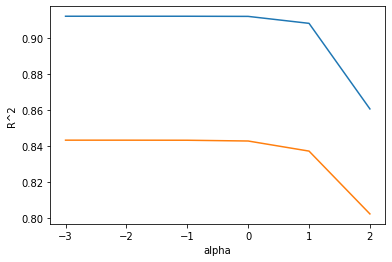

In [ ]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#alpha value가 0.0001~1까지 일정한 것을 볼 수 있다. 

In [ ]:
for a,b,c in zip(alpha_list,train_score,test_score):
  print('alpha_Value : ',a,', train_score : ',b,', test_score : ',c)
#값이 1까지는 다 비슷비슷

alpha_Value :  0.001 , train_score :  0.9121657419429596 , test_score :  0.8432323696571855
alpha_Value :  0.01 , train_score :  0.9121657331055637 , test_score :  0.8432285927767883
alpha_Value :  0.1 , train_score :  0.9121648582130596 , test_score :  0.8431903338024711
alpha_Value :  1 , train_score :  0.9120854537232597 , test_score :  0.8427648613896839
alpha_Value :  10 , train_score :  0.9082135856729554 , test_score :  0.8371526091647161
alpha_Value :  100 , train_score :  0.8606134803468871 , test_score :  0.802209231545109


In [ ]:
#라쏘도 alpha_value 조정해가며 최상의 값을 찾아보자
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  #라쏘 만들면서 알파값 지정
  lasso = Lasso(alpha=alpha)
  lasso.fit(scaled_train_data,train_target)
  train_score.append(lasso.score(scaled_train_data,train_target))
  test_score.append(lasso.score(scaled_test_data,test_target))

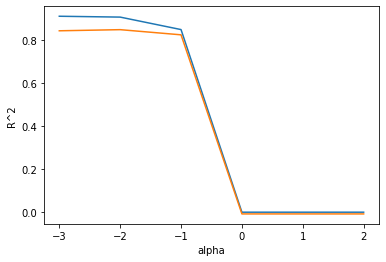

In [ ]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#alpha값이 -3이하일때 좋은걸까,, 좀 더 낮게 계수를 잡기로 했다. 약간 시그모이드의 역함수로 나온 것 같기도 하고..

In [ ]:
train_score = []
test_score = []
alpha_list = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  #라쏘 만들면서 알파값 지정
  lasso = Lasso(alpha=alpha)
  lasso.fit(scaled_train_data,train_target)
  train_score.append(lasso.score(scaled_train_data,train_target))
  test_score.append(lasso.score(scaled_test_data,test_target))

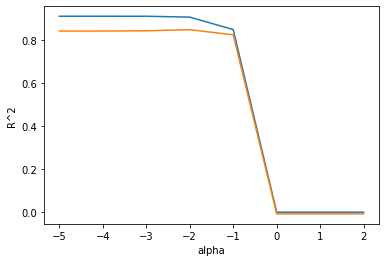

In [ ]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#낮을수록 과대,과소에서 자유로워 지는 것 같다.

In [ ]:
for a,b,c in zip(alpha_list,train_score,test_score):
  print('alpha_Value : ',a,', train_score : ',b,', test_score : ',c)
#0.00001일때 가장 좋은건 맞지만 비슷비슷...

alpha_Value :  1e-05 , train_score :  0.9121657372764337 , test_score :  0.843245008565534
alpha_Value :  0.0001 , train_score :  0.9121652308434397 , test_score :  0.8433546135310929
alpha_Value :  0.001 , train_score :  0.9121141319561525 , test_score :  0.8444089699210386
alpha_Value :  0.01 , train_score :  0.9081179474799396 , test_score :  0.84966731602198
alpha_Value :  0.1 , train_score :  0.8500459567067947 , test_score :  0.8256348558260539
alpha_Value :  1 , train_score :  0.0 , test_score :  -0.008018593990101408
alpha_Value :  10 , train_score :  0.0 , test_score :  -0.008018593990101408
alpha_Value :  100 , train_score :  0.0 , test_score :  -0.008018593990101408


In [ ]:
#로지스틱 회귀를 합시다.
#로지스틱 회귀 자체는 0,1을 분류하기 때문에 지금 target이 3개 클래스라 다중 로지스틱 회귀분석을 진행할 것이다.
#max_iter = 1000을 고정으로하고 규제를 1, 10, 20, 30, 40, 50으로 점점 풀어줘보겠다.
C_list = [1,10,20,30,40,50]
for C in C_list:
  lr = LogisticRegression(C=C, max_iter=1000)
  lr.fit(scaled_train_data,train_target)
  print(lr.score(scaled_train_data,train_target))
  print(lr.score(scaled_test_data,test_target))
  #아니 전부 1이...

1.0
0.9333333333333333
1.0
0.8888888888888888
1.0
0.8888888888888888
1.0
0.8888888888888888
1.0
0.8888888888888888
1.0
0.8888888888888888


In [ ]:
proba = lr.predict_proba(scaled_train_data[:10])

In [ ]:
print(np.round(proba, decimals=2))
#데이터가 로지스틱 다중 회귀에 맞추어져 있는것 같다.

[[1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   0.99 0.01]
 [0.01 0.99 0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]]


In [ ]:
#확률적 경사 하강법

In [ ]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(scaled_train_data,train_target)
print(sc.score(scaled_train_data,train_target))
print(sc.score(scaled_test_data,test_target))


1.0
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
dt = DecisionTreeClassifier(max_depth=15)

In [ ]:
dt.fit(scaled_train_data, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# 의사결정나무 훈련 41퍼 검증 37퍼.... depth를 15까지 높였더니 잘 나오긴 하지만 과대적합하다.
print(dt.score(scaled_train_data,train_target))
print(dt.score(scaled_test_data,test_target))

1.0
0.9333333333333333


In [ ]:
from sklearn.tree import plot_tree

[Text(643.8461538461538, 747.4499999999999, 'proline <= 0.03\ngini = 0.662\nsamples = 133\nvalue = [44, 51, 38]'),
 Text(343.38461538461536, 611.55, 'flavanoids <= -0.617\ngini = 0.49\nsamples = 82\nvalue = [1, 49, 32]'),
 Text(171.69230769230768, 475.65, 'color_intensity <= -0.631\ngini = 0.239\nsamples = 36\nvalue = [0, 5, 31]'),
 Text(85.84615384615384, 339.74999999999994, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(257.53846153846155, 339.74999999999994, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]'),
 Text(515.0769230769231, 475.65, 'hue <= -1.309\ngini = 0.084\nsamples = 46\nvalue = [1, 44, 1]'),
 Text(429.23076923076917, 339.74999999999994, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(600.9230769230769, 339.74999999999994, 'alcohol <= 0.216\ngini = 0.043\nsamples = 45\nvalue = [1, 44, 0]'),
 Text(515.0769230769231, 203.8499999999999, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(686.7692307692307, 203.8499999999999, 'flavanoids <= 0.221\ngini = 0.444\n

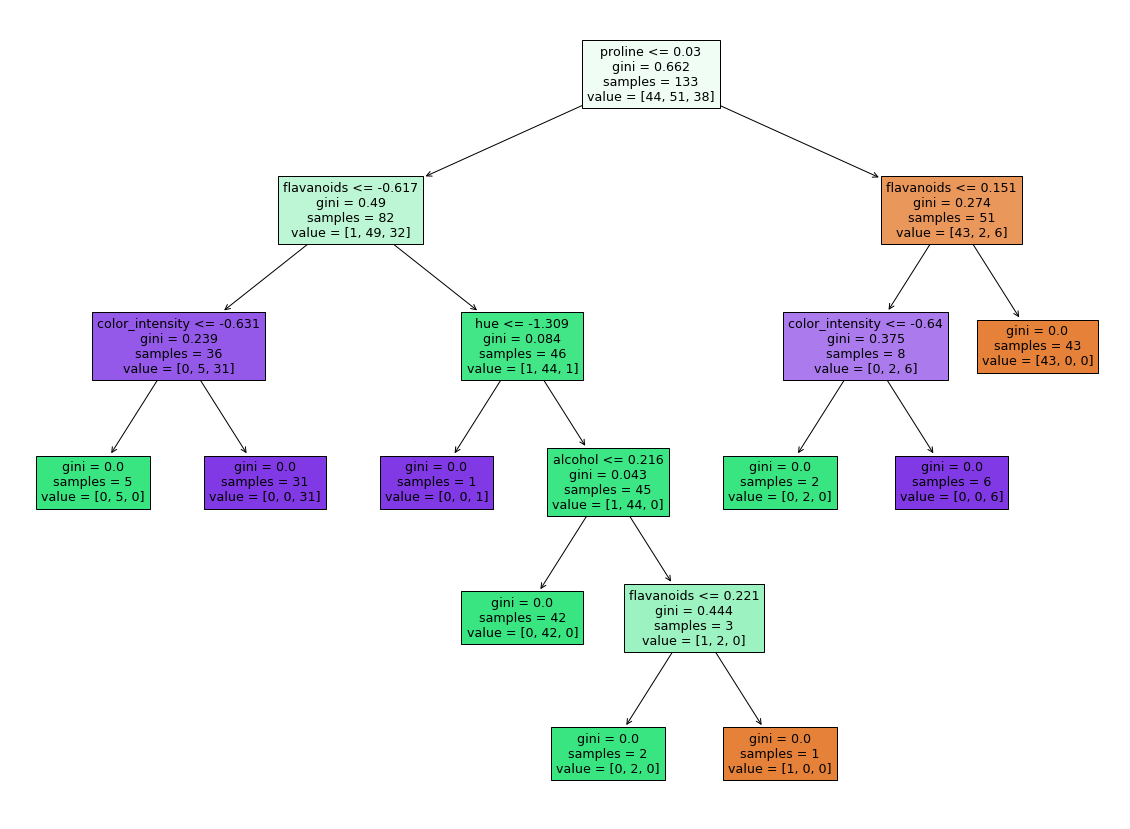

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=wine.feature_names)

In [ ]:
#교차검증중
scores=cross_validate(dt,scaled_train_data,train_target)

In [ ]:
print(scores)

{'fit_time': array([0.00116611, 0.00087929, 0.00091267, 0.00093532, 0.00078273]), 'score_time': array([0.00050282, 0.00038028, 0.00050259, 0.00036836, 0.00043273]), 'test_score': array([0.92592593, 0.88888889, 0.88888889, 0.96153846, 0.88461538])}


In [ ]:
import numpy as np
print(np.mean(scores['test_score']))

0.90997150997151


In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
splitter = StratifiedKFold(n_splits=10,shuffle=True)
scores = cross_validate(dt,train_data,train_target, cv =StratifiedKFold())

In [ ]:
print(np.mean(scores['test_score']))

0.9025641025641026
